# Exploratory Data Analysis (EDA) for CUAD Audit Rights Dataset
This notebook explores the `cuad_audit_rights` subset of the LegalBench dataset to understand its structure, label distribution, clause lengths, and common terms.

In [3]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [5]:
# Load dataset
dataset = load_dataset("nguha/legalbench", "cuad_audit_rights", trust_remote_code=True)
df = pd.DataFrame(dataset['test'])  # Using 'test' split; adjust if needed
df['cleaned_text'] = df['text'].apply(lambda x: x.strip().lower())
df['label'] = df['answer'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
print(f'Total clauses: {len(df)}')
df.head()

Total clauses: 1216


,answer,index,text,document_name,cleaned_text,label
0,Yes,0,The Publishers and/or their respective indepen...,HEALTHGATEDATACORP_11_24_1999-EX-10.1-HOSTING ...,the publishers and/or their respective indepen...,1
1,Yes,1,"Upon the written request of a Party (""Requesti...",MACROGENICSINC_08_02_2013-EX-10-COLLABORATION ...,"upon the written request of a party (""requesti...",1
2,Yes,2,"Each Party to this Agreement, at its own expen...",TELEGLOBEINTERNATIONALHOLDINGSLTD_03_29_2004-E...,"each party to this agreement, at its own expen...",1
3,Yes,3,Such inspections may be made no more than once...,FIBROGENINC_10_01_2014-EX-10.11-COLLABORATION ...,such inspections may be made no more than once...,1
4,Yes,4,You will make available to us all original boo...,BUFFALOWILDWINGSINC_06_05_1998-EX-10.3-FRANCHI...,you will make available to us all original boo...,1


Label Distribution

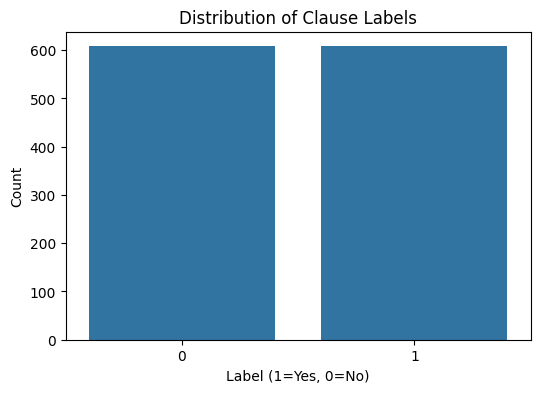

Label distribution:
label
1    608
0    608
Name: count, dtype: int64


In [6]:
# Visualize label distribution
label_counts = df['label'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Clause Labels')
plt.xlabel('Label (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()
print(f'Label distribution:\n{label_counts}')

Clause Length Analysis

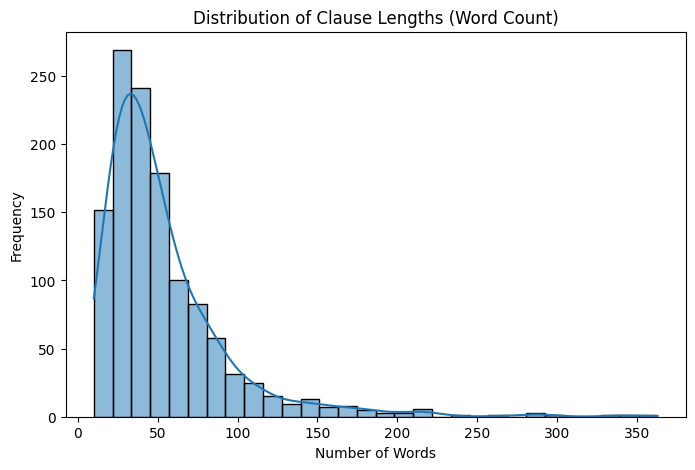

Average clause length: 53.62 words
Max clause length: 363 words


In [7]:
# Analyze clause lengths
df['clause_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['clause_length'], bins=30, kde=True)
plt.title('Distribution of Clause Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()
print(f'Average clause length: {df["clause_length"].mean():.2f} words')
print(f'Max clause length: {df["clause_length"].max()} words')

Word Cloud for "Yes" Clauses

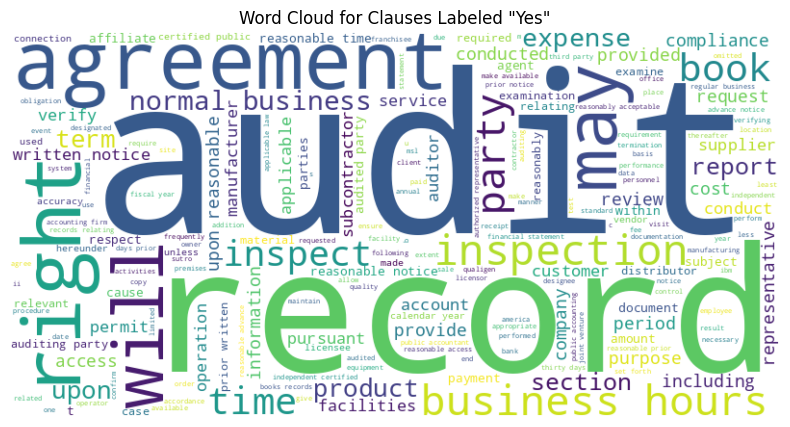

In [8]:
# Word cloud for clauses labeled "Yes"
yes_clauses = ' '.join(df[df['label'] == 1]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(yes_clauses)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Clauses Labeled "Yes"')
plt.show()

Word Cloud for "No" Clauses

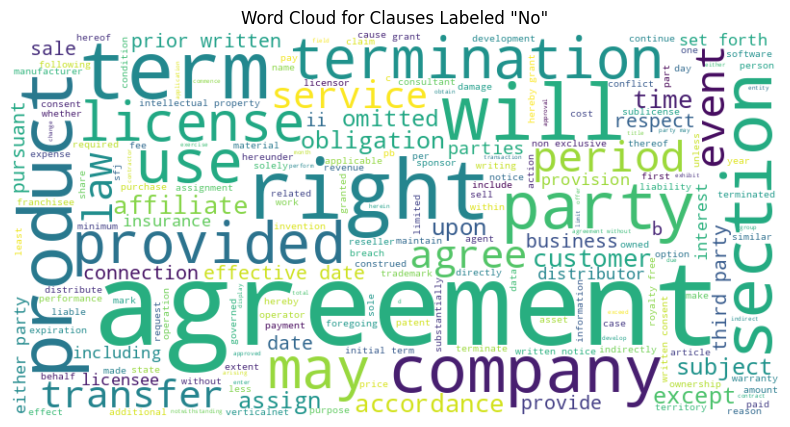

In [9]:
# Word cloud for clauses labeled "No"
no_clauses = ' '.join(df[df['label'] == 0]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(no_clauses)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Clauses Labeled "No"')
plt.show()